In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('/Users/anish/Documents/DSP Datasets/Cleaned_Games_For_Model.csv')
df

,Unnamed: 0,Name,Platform,Summary,Global_Sales,Preprocessed_Summary,Preprocessed_Summary_More
0,555,LEGO Marvel Super Heroes,PS3,LEGO Marvel Super Heroes features an original ...,2.00,lego marvel super hero feature original story ...,iron hulk captain wolverine unite loki assembl...
1,556,Fire Emblem: Awakening,3DS,Lead an army of soldiers in a series of scaled...,2.00,lead army soldier series scaled turn-based str...,scaled turn-based process relationship utilizi...
2,557,Mortal Kombat vs. DC Universe,PS3,"For the first time ever Scorpion, Sub-Zero and...",2.00,first time ever scorpion sub-zero mortal komba...,scorpion sub-zero mortal kombat batman superma...
3,558,Tenchu: Stealth Assassins,PS,Prowl and strike with lethal precision as ninj...,1.99,prowl strike lethal precision ninja assassin r...,prowl lethal precision assassin rikimaru ayame...
4,559,Harry Potter and the Chamber of Secrets,GBA,Be Harry Potter in a new adventure with more m...,1.99,harry potter new adventure magic friend danger...,potter danger sophomore hogwarts witchcraft wi...
...,...,...,...,...,...,...,...
5511,6066,Battle Fantasia,PS3,Apart from the fast paced combat and responsiv...,0.01,apart fast paced combat responsive control 's ...,apart paced responsive apart rest fantasia pla...
5512,6067,Super Robot Taisen: Original Generation,GBA,Super Robot Taisen: Original Generation is a s...,0.01,super robot taisen original generation strateg...,robot taisen dozen mecha 40+
5513,6068,Mortal Kombat: Deadly Alliance,GBA,A controversial franchise marks its return in ...,0.01,controversial franchise mark return mortal kom...,controversial mark mortal kombat alliance in-d...
5514,6069,PGA European Tour,N64,"Realism, Authenticity, Sophistication and a Eu...",0.01,realism authenticity sophistication european t...,realism authenticity sophistication european e...


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Vectorize the preprocessed descriptions using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(df['Preprocessed_Summary'])
y = df['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
random_forest_regressor = RandomForestRegressor(n_estimators=1000)
random_forest_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = random_forest_regressor.predict(X_test)


In [21]:
# Calculate RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Root Mean Squared Error (RMSE): 0.4419746372509085
Mean Squared Error: 0.1953415799730722


In [22]:
# Calculate RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.4419746372509085


In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.19375828884623683


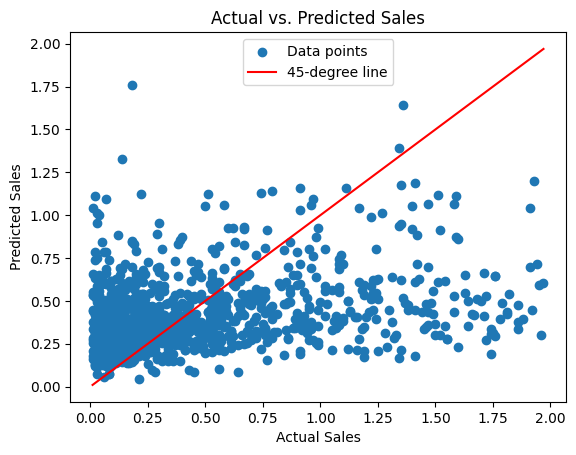

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test contains actual sales values and y_pred contains predicted sales values

# Create a scatter plot of Actual vs. Predicted Sales
plt.scatter(y_test, y_pred, label='Data points')

# Plot the 45-degree line
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='45-degree line')

# Add labels and title
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()

# Show plot
plt.show()

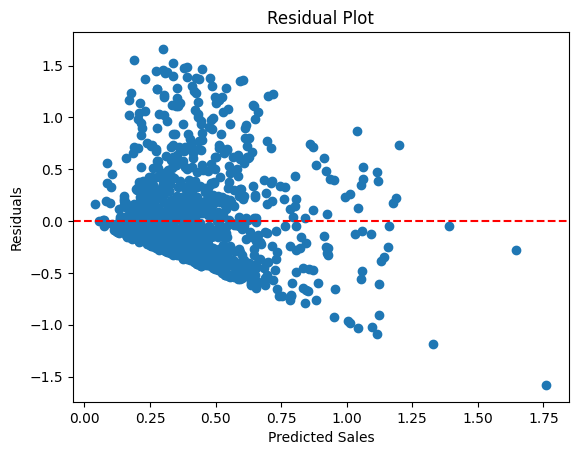

In [16]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

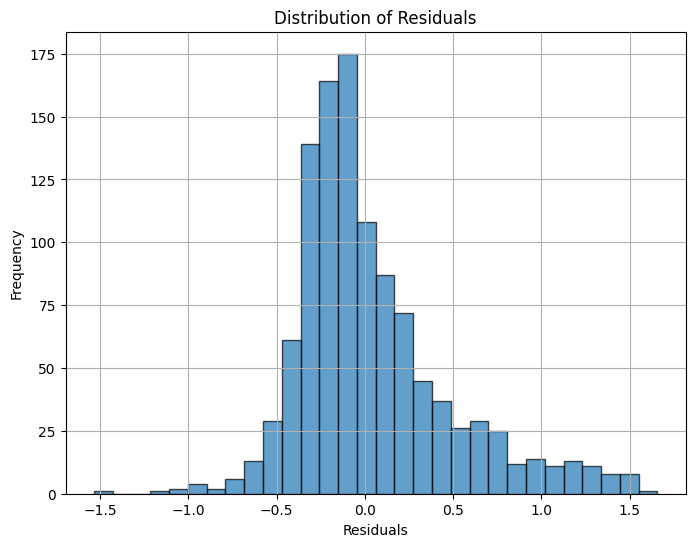

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

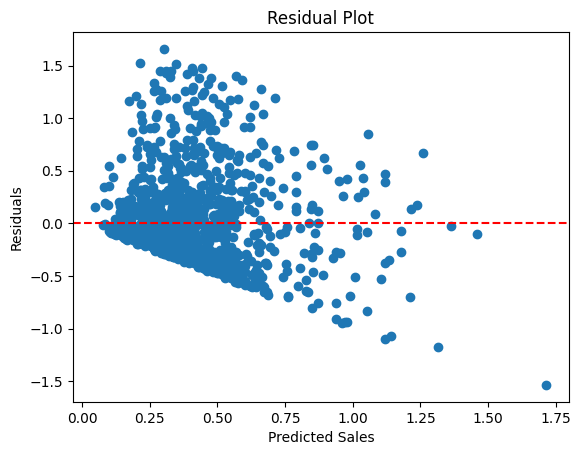

In [25]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot of Predicted Sales vs. Residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import mean_squared_error


# Split the data into features (X) and target variable (y)
X = df['preprocessed_description']
y = df['sales']

# Vectorize the preprocessed descriptions using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # You can adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [ ]:
# Initialize XGBoost model with best parameters
best_xgb_model = xgb.XGBRegressor(**best_params)

# Train the model with the best parameters
best_xgb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_xgb_model.predict(X_test)
